In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv("hf.csv")
df_copy = df.copy()

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#Shape
df.shape

(299, 13)

In [5]:
# Check Column 
df.columns
df["DEATH_EVENT"].replace({0: "NON FATAL", 1: "FATAL"}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(9), object(1)
memory usage: 30.5+ KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


In [8]:
target = 'DEATH_EVENT'
features_list = list(df_copy.columns)
features_list.remove(target)

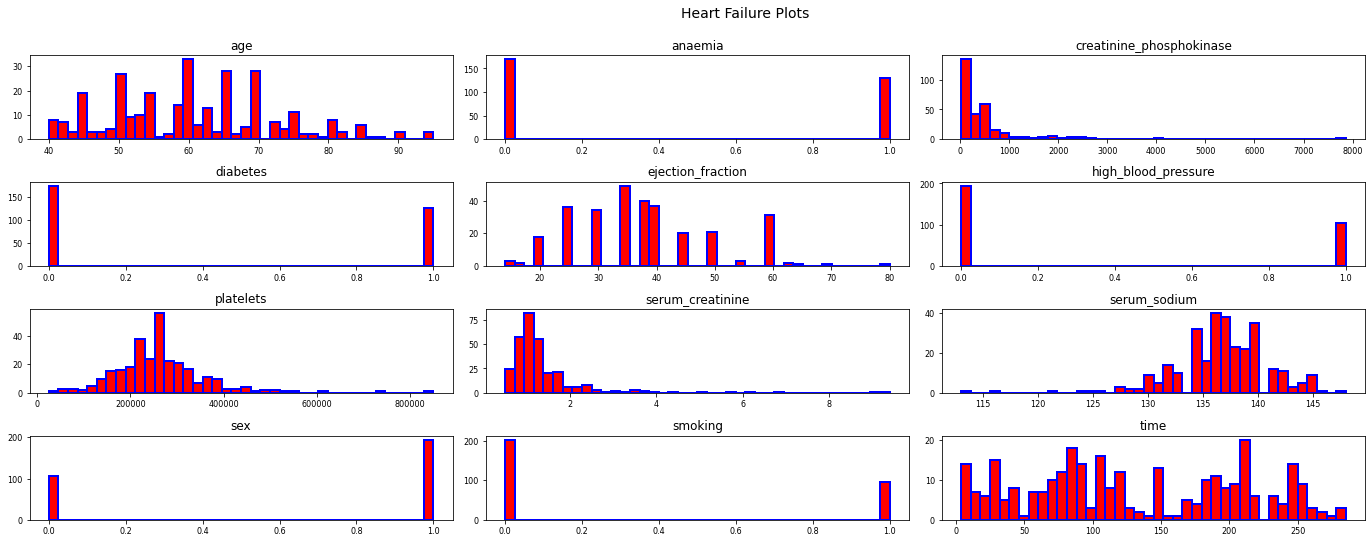

In [9]:
df_copy[features_list].hist(bins=40, edgecolor='b', linewidth=2.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Heart Failure Plots', x=0.65, y=1.25, fontsize=14);

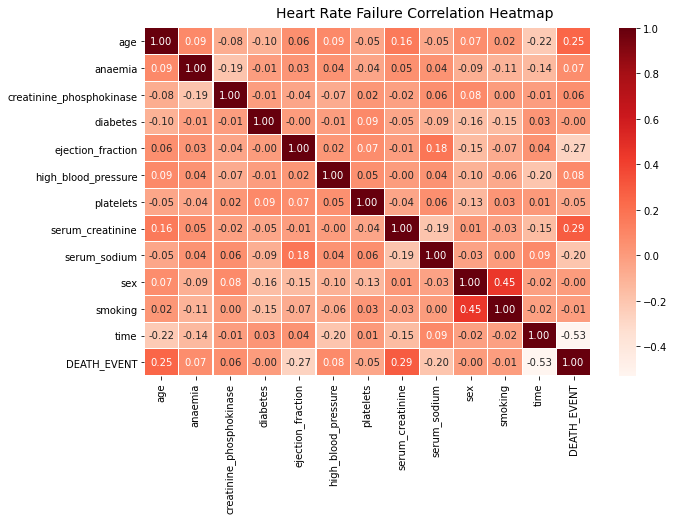

In [10]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_copy.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart Rate Failure Correlation Heatmap', fontsize=14)

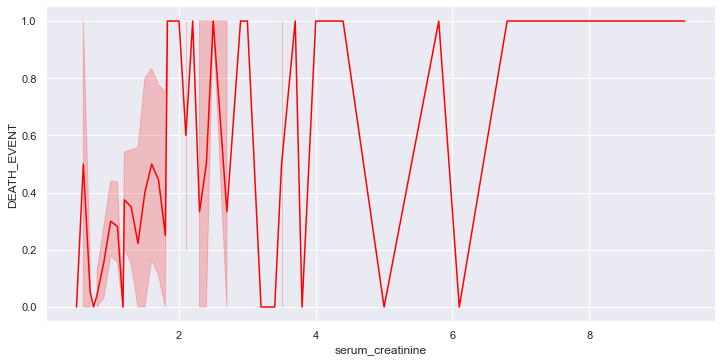

In [11]:
sns.set()
sns.relplot(data = df_copy, x = 'serum_creatinine', y = target, kind = 'line', height = 5, aspect = 2, color = 'red');

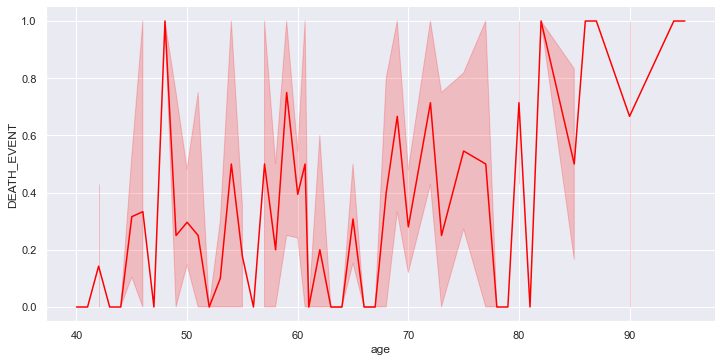

In [12]:
sns.set()
sns.relplot(data = df_copy, x = 'age', y = target, kind = 'line', height = 5, aspect = 2, color = 'red');

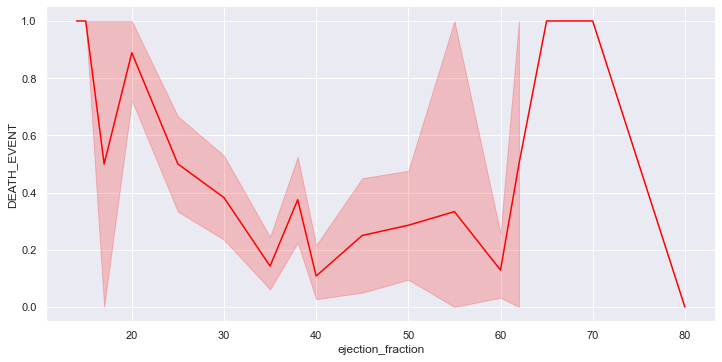

In [13]:
sns.set()
sns.relplot(data = df_copy, x = 'ejection_fraction', y = target, kind = 'line', height = 5, aspect = 2, color = 'red');

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
Y = df['DEATH_EVENT']
class_names = Y.unique()

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [19]:
X_train.shape

(209, 11)

In [20]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
190,80.0,0,582,1,35,0,350000.00,2.10,134,1,0
235,77.0,1,109,0,50,1,406000.00,1.10,137,1,0
46,51.0,0,1380,0,25,1,271000.00,0.90,130,1,0
273,42.0,0,64,0,40,0,189000.00,0.70,140,1,0
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0


In [21]:
Y_train.head()

190    NON FATAL
235    NON FATAL
46         FATAL
273    NON FATAL
220        FATAL
Name: DEATH_EVENT, dtype: object

In [22]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, Y_train)

LogisticRegression()

In [23]:
model_logreg.predict(X_test)

array(['NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL',
       'NON FATAL', 'FATAL', 'NON FATAL', 'NON FATAL', 'FATAL',
       'NON FATAL', 'FATAL', 'FATAL', 'NON FATAL', 'NON FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'FATAL',
       'NON FATAL', 'NON FATAL', 'FATAL', 'NON FATAL', 'NON FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'FATAL', 'NON FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'FATAL',
       'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL', 'NON FATAL',
       'FATAL', 'NON FATAL',

In [24]:
accuracy_score(Y_test, model_logreg.predict(X_test))

0.7777777777777778

In [25]:
import lime
import lime.lime_tabular

In [26]:
feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
feature_names

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking']

In [27]:
class_names

array(['FATAL', 'NON FATAL'], dtype=object)

In [28]:
# Change the Features to Numpy Arrays to avoid 
# TypeError: '(slice(None, None, None), 0)' is an invalid key
X_train.values

array([[8.00e+01, 0.00e+00, 5.82e+02, ..., 1.34e+02, 1.00e+00, 0.00e+00],
       [7.70e+01, 1.00e+00, 1.09e+02, ..., 1.37e+02, 1.00e+00, 0.00e+00],
       [5.10e+01, 0.00e+00, 1.38e+03, ..., 1.30e+02, 1.00e+00, 0.00e+00],
       ...,
       [8.00e+01, 0.00e+00, 1.48e+02, ..., 1.44e+02, 1.00e+00, 1.00e+00],
       [4.50e+01, 0.00e+00, 5.82e+02, ..., 1.37e+02, 0.00e+00, 0.00e+00],
       [6.00e+01, 1.00e+00, 9.50e+01, ..., 1.38e+02, 1.00e+00, 1.00e+00]])

In [29]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

In [30]:
# The Explainer Instance
exp = explainer.explain_instance(X_test.iloc[2], model_logreg.predict_proba, num_features=6, top_labels=1)

In [31]:
exp.show_in_notebook(show_table=True, show_all=False)

In [32]:
# Verify Our Sample
X_test.iloc[2]

age                             50.0
anaemia                          1.0
creatinine_phosphokinase      1051.0
diabetes                         1.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   232000.0
serum_creatinine                 0.7
serum_sodium                   136.0
sex                              0.0
smoking                          0.0
Name: 278, dtype: float64

In [33]:
X_test[0:1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
268,45.0,0,582,1,38,0,302000.0,0.9,140,0,0


In [34]:
# Reshape To A Single Sample (1,-1)
mysample = np.array(X_test.iloc[10]).reshape(1, -1)

In [35]:
# Prediction of our sample
model_logreg.predict(mysample)

array(['NON FATAL'], dtype=object)

In [36]:
X_test.iloc[7]

age                             63.0
anaemia                          1.0
creatinine_phosphokinase       103.0
diabetes                         1.0
ejection_fraction               35.0
high_blood_pressure              0.0
platelets                   179000.0
serum_creatinine                 0.9
serum_sodium                   136.0
sex                              1.0
smoking                          1.0
Name: 293, dtype: float64

In [37]:
exp2 = explainer.explain_instance(X_test.iloc[7], model_logreg.predict_proba, num_features=7, top_labels=1)

In [38]:
exp2.show_in_notebook(show_table=True, show_all=True)